In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

!ls

README.md              mm_agn_clusters.ipynb  mm_merge_photons.ipynb
functions.py           mm_hmf_clusters.ipynb


# AGNs

In [2]:
data_name = "../data/eROSITA_cluster_agn_box2hr/agn_092.dat"
headers1 = ["ID", 
            "x [kpc/h]", 
            "y [kpc/h]", 
            "z[kpc/h]", 
            "M [Msol]", 
            "Mdot [Msol/year]", 
            "Lbol [erg/s]", 
            "Lsoftx [erg/s]", 
            "Lhard [erg/s]", 
            "f_obs"]
table1 = pd.read_csv(data_name, comment='#', header=None, sep='\s+', names=headers1)
table1

ID     x [kpc/h]  y [kpc/h]   z[kpc/h]     M [Msol]  \
0            0  240134.23000  278604.62  216048.58   39442900.0   
1            1  238934.14000  278966.09  216201.14  132927000.0   
2            2  238487.81000  278987.03  216040.61   79275000.0   
3            3  237887.23000  277908.97  216132.50   67656000.0   
4            4  236814.19000  278410.41  216421.95  101353000.0   
...        ...           ...        ...        ...          ...   
362237  390241    1199.33250  148509.62  158785.95  137284000.0   
362238  390243     918.27228  147657.55  160155.78  135256000.0   
362239  390244     800.08716  146986.00  160445.52  114989000.0   
362240  390245    9111.28420  152372.50  155277.52   82102500.0   
362241  390246    8339.17190  149483.89  160696.28   10574900.0   

        Mdot [Msol/year]  Lbol [erg/s]  Lsoftx [erg/s]  Lhard [erg/s]  \
0               0.000095  5.980697e+41    5.099707e+40   7.828258e+40   
1               0.000101  6.380837e+41    5.418299e+40   8.306542e+40   
2               0.000214  1.352523e+42    1.086058e+41   1.640156e+41   
3               0.000628  3.964621e+42    2.871005e+41   4.243506e+41   
4               0.000999  6.303717e+42    4.331131e+41   6.342556e+41   
...                  ...           ...             ...            ...   
362237          0.000207  1.307974e+42    1.053215e+41   1.591622e+41   
362238          0.000421  2.658653e+42    2.006838e+41   2.990020e+41   
362239          0.000192  1.212590e+42    9.824784e+40   1.486975e+41   
362240          0.000296  1.869630e+42    1.459404e+41   2.189755e+41   
362241          0.043647  2.754678e+44    1.055730e+43   1.433528e+43   

           f_obs  
0       1.000000  
1       1.000000  
2       1.000000  
3       0.935222  
4       0.885045  
...          ...  
362237  1.000000  
362238  0.978924  
362239  1.000000  
362240  1.000000  
362241  0.495312  

[362242 rows x 10 columns]

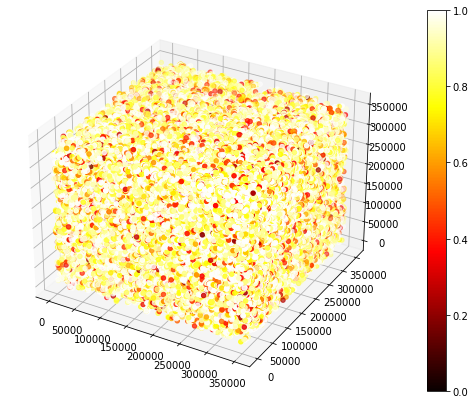

In [3]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table1.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,9]

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# CLUSTERS

In [4]:
data_name = "../data/eROSITA_cluster_agn_box2hr/cluster_092.dat"
headers2 = ["ID",
            "x [kpc/h]", 
            "y [kpc/h]",
            "z[kpc/h]",
            "Mvir [Msol/h]", 
            "M200m [Msol/h]",
            "M500m [Msol/h]", 
            "M200c [Msol/h]", 
            "M500c [Msol/h]", 
            "R500c [kpc/h]",
            "Mgas_500c [Msol/h]",  
            "Mstar_500c [msol/h]", 
            "T_500c [keV]",
            "Lx_500c [1e44 erg/s]"]
  
table2 = pd.read_csv(data_name, comment='#', sep='\s+', header=None, names=headers2)
table2

ID  x [kpc/h]   y [kpc/h]    z[kpc/h]  Mvir [Msol/h]  M200m [Msol/h]  \
0      0  209662.89  204439.160  350198.380   1.291030e+15    1.353640e+15   
1      1  315504.91   24307.531  278968.970   6.596320e+14    6.963740e+14   
2      2  327344.81  231334.050  209859.410   5.868580e+14    6.261910e+14   
3      3  250312.62  124154.620  152601.860   6.100200e+14    6.539930e+14   
4      4  228365.23  251743.360   37959.930   4.529730e+14    4.855830e+14   
..   ...        ...         ...         ...            ...             ...   
392  633  310383.62   23657.348   52717.359   7.255710e+13    7.624380e+13   
393  640  254069.62  323948.190  113528.680   7.916330e+13    8.101860e+13   
394  641  282823.16  197597.220  162560.380   8.053650e+13    8.280380e+13   
395  653  327764.91  298013.000  295632.530   8.146270e+13    8.457510e+13   
396  658  203280.50  149028.480  152421.340   7.717610e+13    7.976140e+13   

     M500m [Msol/h]  M200c [Msol/h]  M500c [Msol/h]  R500c [kpc/h]  \
0      8.768320e+14    1.066300e+15    6.381420e+14       1317.500   
1      4.933810e+14    5.734760e+14    3.555280e+14       1084.090   
2      4.266780e+14    4.803030e+14    3.455940e+14       1073.870   
3      4.571940e+14    5.200830e+14    3.548280e+14       1083.380   
4      3.415140e+14    3.900380e+14    2.746690e+14        994.725   
..              ...             ...             ...            ...   
392    5.966020e+13    6.474390e+13    5.082570e+13        566.838   
393    6.878390e+13    7.459810e+13    5.720840e+13        589.649   
394    6.744130e+13    7.380510e+13    5.089760e+13        567.110   
395    6.641930e+13    7.345440e+13    5.436640e+13        579.707   
396    6.476450e+13    7.061160e+13    5.281030e+13        574.124   

     Mgas_500c [Msol/h]  Mstar_500c [msol/h]  T_500c [keV]  \
0          8.039430e+13         1.828060e+13       6.79982   
1          4.279230e+13         1.029420e+13       5.00653   
2          4.230100e+13         8.609530e+12       5.30121   
3          3.800410e+13         1.197950e+13       5.52798   
4          2.981750e+13         1.017560e+13       4.79817   
..                  ...                  ...           ...   
392        4.502600e+12         1.537580e+12       1.47042   
393        5.763540e+12         1.565750e+12       1.50931   
394        4.559750e+12         1.361160e+12       1.44538   
395        4.288360e+12         1.692740e+12       1.68373   
396        4.823410e+12         1.636750e+12       1.45970   

     Lx_500c [1e44 erg/s]  
0               28.828400  
1                8.318200  
2               13.241600  
3                6.703500  
4                5.777400  
..                    ...  
392              0.306448  
393              0.574427  
394              0.265205  
395              0.272670  
396              0.325305  

[397 rows x 14 columns]

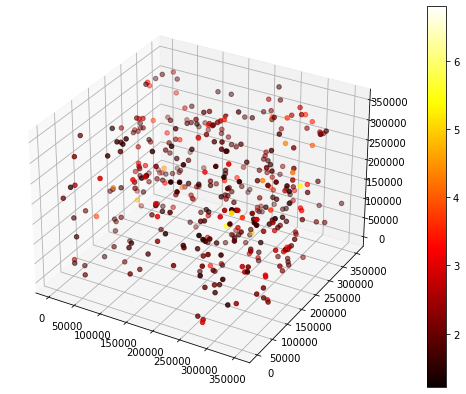

In [5]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table2.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,12]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# SCALING RELATIONS

Let's check whether parameters of these clusters satisfy scaling relations from Churazov et al. (2015):

z = 0.5181775

<Figure size 432x288 with 0 Axes>

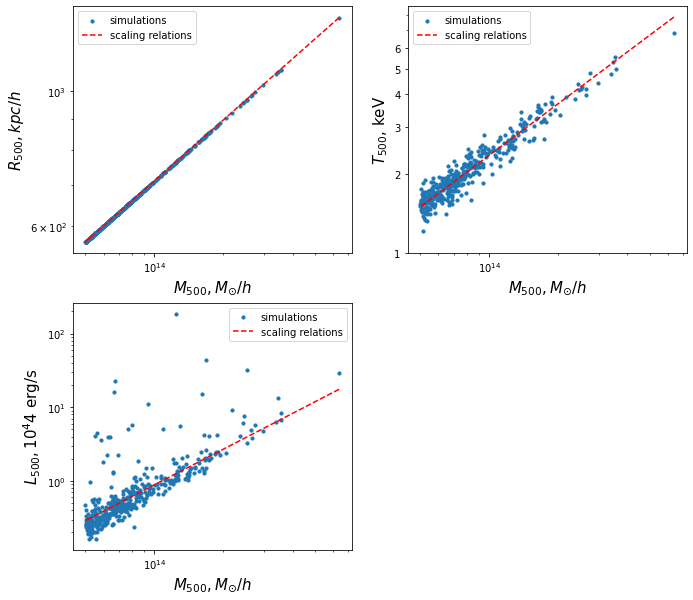

In [19]:
%run -i 'functions.py'

plt.figure(figsize=(11, 10))

M500s = table2["M500c [Msol/h]"]
R500s = table2["R500c [kpc/h]"]
T500s = table2["T_500c [keV]"]
L500s = table2["Lx_500c [1e44 erg/s]"]

zzz = [0.5181775]*len(M500s)
R500s_rel = R500(M500s, zzz)
T500s_rel = T_X(M500s, zzz)
L500s_rel = L_X(M500s, zzz, 0.704)

plt.subplot(221)
plt.scatter(M500s, R500s, s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$R_{500}, kpc/h$", fontsize=15)
plt.legend()

plt.subplot(222)
plt.scatter(M500s, T500s, s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
plt.legend()

plt.subplot(223)
plt.scatter(M500s, L500s, s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$L_{500}, 10^44$ erg/s", fontsize=15)
plt.legend()

plt.show()

## ... and from 5x5 field adjusted for different $z$:

In [20]:
spisok0 = pd.read_csv("../data/eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')
spisok1 = spisok0[spisok0["M500"]>1e14]
spisok2 = spisok1[spisok1["z_true"]>0.02]
spisok = spisok2[spisok2["z_true"]<0.9]
spisok

#ihal     x_pix     y_pix     z_pix      Rrel          Mvir    z_true  \
55915      8  0.477773  0.905290  0.152051  0.007891  2.260120e+14  0.881625   
59465     25  0.507521  0.545246  0.268085  0.007974  2.014060e+14  0.828964   
60278     56  0.940982  0.330081  0.510556  0.007392  1.604510e+14  0.843258   
60679      1  0.889274  0.210127  0.633906  0.010892  5.133600e+14  0.850574   
61946     65  0.625054  0.409478  0.057728  0.007736  1.574460e+14  0.759249   
62308      1  0.569552  0.283180  0.180889  0.011669  5.403810e+14  0.766220   
62969     23  0.869501  0.594314  0.392228  0.008305  1.947960e+14  0.778245   
63559     17  0.297899  0.714803  0.590043  0.008942  2.431550e+14  0.789576   
64222     62  0.903609  0.006148  0.843746  0.007781  1.602200e+14  0.804217   
64564     10  0.775554  0.603950  0.962853  0.009344  2.774520e+14  0.811133   
65431     45  0.880878  0.349044  0.308074  0.008787  1.957330e+14  0.717409   
65619     35  0.234449  0.200435  0.393866  0.009032  2.126130e+14  0.722146   
66059     37  0.426537  0.838567  0.562243  0.009093  2.168920e+14  0.731482   
66304     55  0.026930  0.348489  0.699367  0.008733  1.921370e+14  0.739123   
67576     20  0.118654  0.259522  0.268729  0.010563  2.855100e+14  0.661040   
67700     24  0.073990  0.963350  0.341272  0.010196  2.567310e+14  0.664916   
67731     21  0.262388  0.172360  0.357644  0.009776  2.262950e+14  0.665792   
68372     39  0.423886  0.645203  0.612833  0.009909  2.356820e+14  0.679497   
68609     44  0.632299  0.692942  0.706879  0.009645  2.173370e+14  0.684576   
68743     15  0.009067  0.759767  0.754159  0.009776  2.263000e+14  0.687135   
70394     65  0.929581  0.764470  0.553570  0.009661  1.811970e+14  0.623338   
70472    134  0.214810  0.069279  0.588420  0.009008  1.468840e+14  0.625156   
70619     31  0.921784  0.707806  0.655302  0.011030  2.696600e+14  0.628648   
70782     25  0.503907  0.624639  0.744836  0.010854  2.569540e+14  0.633335   
70812    140  0.456777  0.878188  0.758963  0.008979  1.454820e+14  0.634076   
70941     43  0.900880  0.790654  0.807446  0.010155  2.104400e+14  0.636620   
70952     87  0.233419  0.135710  0.813708  0.009745  1.860110e+14  0.636949   
71539     39  0.850066  0.040310  0.061641  0.011446  2.467240e+14  0.547390   
72184     47  0.033360  0.322625  0.412460  0.011480  2.489250e+14  0.564938   
72370     64  0.275009  0.379884  0.506123  0.011070  2.232290e+14  0.569651   
74172     38  0.658780  1.005990  0.529743  0.012446  2.558010e+14  0.521208   
74938     13  0.687895  0.606044  0.092157  0.015950  4.265480e+14  0.452565   
75861    122  0.113317  0.419767  0.839154  0.011900  1.771610e+14  0.487836   
76065     59  0.123418  0.643612  0.005405  0.013616  2.059820e+14  0.402738   
76766     70  0.124967  0.664418  0.499156  0.013992  2.235280e+14  0.425196   
77065    107  0.893899  0.277746  0.740315  0.013516  2.014840e+14  0.436266   
77267    111  0.370781  0.822603  0.865865  0.013776  2.133550e+14  0.442055   
77273      5  0.797343  0.073305  0.869902  0.019824  6.357350e+14  0.442241   
78486     46  0.032044  0.892159  0.036873  0.018160  2.721200e+14  0.316819   
78830    221  0.854477  0.310322  0.774290  0.015384  1.654340e+14  0.348400   
79154      3  0.406535  0.648400  0.252101  0.025552  5.374170e+14  0.284084   
79306    207  0.383231  0.347559  0.464834  0.017631  1.765110e+14  0.292898   
79532     32  0.233221  0.078393  0.857205  0.021217  3.076550e+14  0.309262   
79956    134  0.476728  0.916077  0.022225  0.025648  2.342170e+14  0.195319   
80044     99  0.966895  0.487328  0.238425  0.025666  2.347070e+14  0.203686   
80221     75  0.139843  0.851634  0.791693  0.027863  3.003040e+14  0.225257   
80359     26  0.405164 -0.022172  0.259098  0.040946  5.586460e+14  0.166428   
80511    141  0.687116  0.297472  0.376564  0.039053  2.520490e+14  0.133851   
80677    199  0.033178  0.207264  0.406194  0.075592  2.400200e+14  0.064342   

      

/var/folders/jy/y9lr1ln92l10dg20twrry6lh0000gn/T/ipykernel_55204/1486198930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spisok.sort_values("M500", inplace=True)


<Figure size 432x288 with 0 Axes>

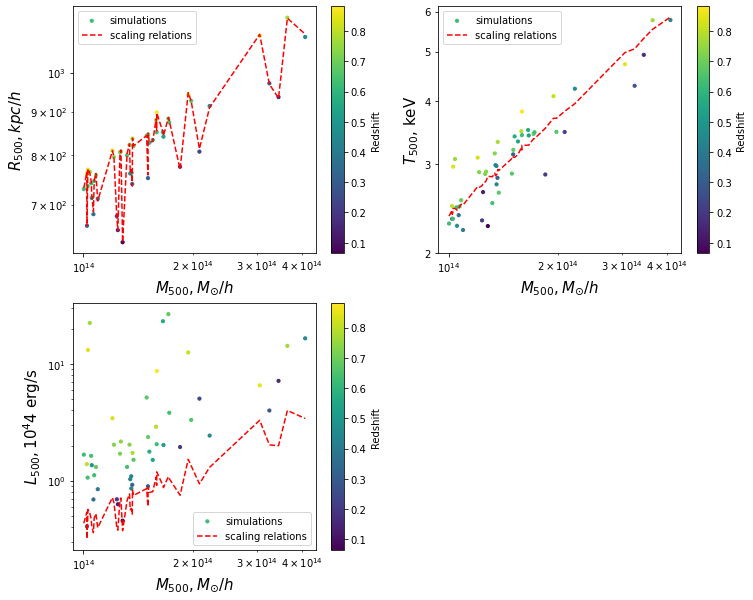

In [33]:
%run -i 'functions.py'

spisok.sort_values("M500", inplace=True)

M500s = spisok["M500"].values
R500s = spisok["R500"].values
T500s = spisok["T500"].values
L500s = spisok["Lx500"].values
zs = spisok["z_true"].values

#for i in range(0, len(spisok)):
R500s_rel = R500(M500s, zs)
T500s_rel = T_X(M500s, zs)
L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.scatter(M500s, R500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$R_{500}, kpc/h$", fontsize=15)
plt.legend()
plt.colorbar(label='Redshift')

plt.subplot(222)
plt.scatter(M500s, T500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.yticks([2,3,4,5,6], [2,3,4,5,6])
plt.legend()
plt.colorbar(label='Redshift')

plt.subplot(223)
plt.scatter(M500s, L500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$L_{500}, 10^44$ erg/s", fontsize=15)
plt.legend()
plt.colorbar(label='Redshift')

plt.show()